<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,28.936268,57.795248,96.731516,75.930180,20.801335
1,0.0,1.0,39.190693,194.920195,244.110888,86.298169,157.812719
2,0.0,2.0,56.832351,36.291089,103.123440,104.135202,-1.011763
3,0.0,3.0,49.293518,102.469623,161.763141,96.512880,65.250262
4,0.0,4.0,83.744749,37.831452,131.576202,131.345646,0.230556
...,...,...,...,...,...,...,...
59995,999.0,55.0,45.354913,31.122752,86.477666,24.558573,61.919093
59996,999.0,56.0,46.622368,258.650966,315.273335,22.289345,292.983990
59997,999.0,57.0,51.273753,-188.332545,-127.058792,13.961591,-141.020383
59998,999.0,58.0,55.476552,101.295834,166.772386,6.436978,160.335408


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,28.936268,57.795248,96.731516,75.930180,20.801335
1,0.0,1.0,39.190693,194.920195,244.110888,86.298169,157.812719
2,0.0,2.0,56.832351,36.291089,103.123440,104.135202,-1.011763
3,0.0,3.0,49.293518,102.469623,161.763141,96.512880,65.250262
4,0.0,4.0,83.744749,37.831452,131.576202,131.345646,0.230556
...,...,...,...,...,...,...,...
59995,999.0,55.0,45.354913,31.122752,86.477666,24.558573,61.919093
59996,999.0,56.0,46.622368,258.650966,315.273335,22.289345,292.983990
59997,999.0,57.0,51.273753,-188.332545,-127.058792,13.961591,-141.020383
59998,999.0,58.0,55.476552,101.295834,166.772386,6.436978,160.335408


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    28.936268   57.795248   96.731516   75.930180   20.801335
      1.0    39.190693  194.920195  244.110888   86.298169  157.812719
      2.0    56.832351   36.291089  103.123440  104.135202   -1.011763
      3.0    49.293518  102.469623  161.763141   96.512880   65.250262
      4.0    83.744749   37.831452  131.576202  131.345646    0.230556
...                ...         ...         ...         ...         ...
999.0 55.0   45.354913   31.122752   86.477666   24.558573   61.919093
      56.0   46.622368  258.650966  315.273335   22.289345  292.983990
      57.0   51.273753 -188.332545 -127.058792   13.961591 -141.020383
      58.0   55.476552  101.295834  166.772386    6.436978  160.335408
      59.0   96.320369 -516.367251 -410.046882  -66.689036 -343.357846

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    28.936268   57.795248   96.731516   75.930180   20.801335
      1.0    39.190693  194.920195  244.110888   86.298169  157.812719
      2.0    56.832351   36.291089  103.123440  104.135202   -1.011763
      3.0    49.293518  102.469623  161.763141   96.512880   65.250262
      4.0    83.744749   37.831452  131.576202  131.345646    0.230556
...                ...         ...         ...         ...         ...
999.0 55.0   45.354913   31.122752   86.477666   24.558573   61.919093
      56.0   46.622368  258.650966  315.273335   22.289345  292.983990
      57.0   51.273753 -188.332545 -127.058792   13.961591 -141.020383
      58.0   55.476552  101.295834  166.772386    6.436978  160.335408
      59.0   96.320369 -516.367251 -410.046882  -66.689036 -343.357846

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,28.936268,57.795248,96.731516,75.930180,20.801335
1,0.0,1.0,39.190693,194.920195,244.110888,86.298169,157.812719
2,0.0,2.0,56.832351,36.291089,103.123440,104.135202,-1.011763
3,0.0,3.0,49.293518,102.469623,161.763141,96.512880,65.250262
4,0.0,4.0,83.744749,37.831452,131.576202,131.345646,0.230556
...,...,...,...,...,...,...,...
59995,999.0,55.0,45.354913,31.122752,86.477666,24.558573,61.919093
59996,999.0,56.0,46.622368,258.650966,315.273335,22.289345,292.983990
59997,999.0,57.0,51.273753,-188.332545,-127.058792,13.961591,-141.020383
59998,999.0,58.0,55.476552,101.295834,166.772386,6.436978,160.335408


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    28.936268   57.795248   96.731516   75.930180   20.801335
      1.0    39.190693  194.920195  244.110888   86.298169  157.812719
      2.0    56.832351   36.291089  103.123440  104.135202   -1.011763
      3.0    49.293518  102.469623  161.763141   96.512880   65.250262
      4.0    83.744749   37.831452  131.576202  131.345646    0.230556
...                ...         ...         ...         ...         ...
999.0 55.0   45.354913   31.122752   86.477666   24.558573   61.919093
      56.0   46.622368  258.650966  315.273335   22.289345  292.983990
      57.0   51.273753 -188.332545 -127.058792   13.961591 -141.020383
      58.0   55.476552  101.295834  166.772386    6.436978  160.335408
      59.0   96.320369 -516.367251 -410.046882  -66.689036 -343.357846

[60000 rows x 5 columns]

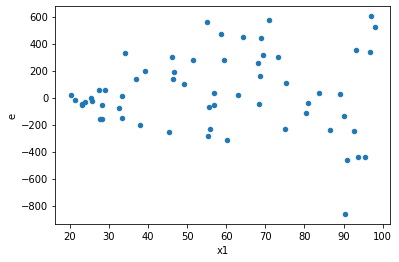

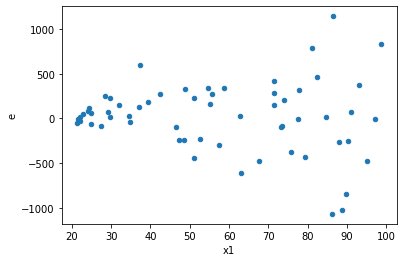

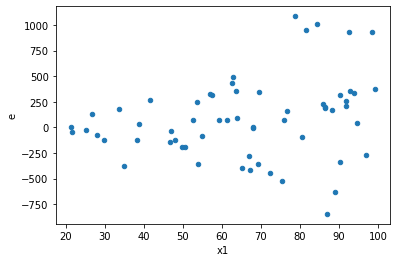

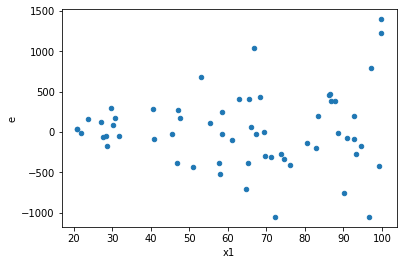

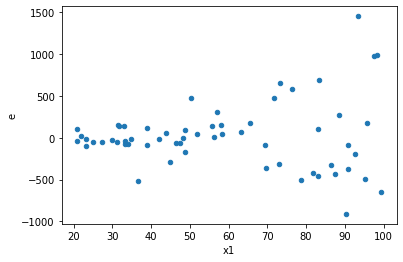

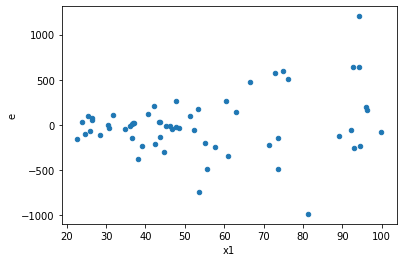

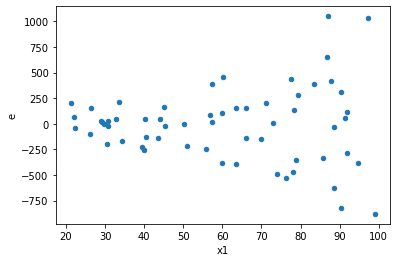

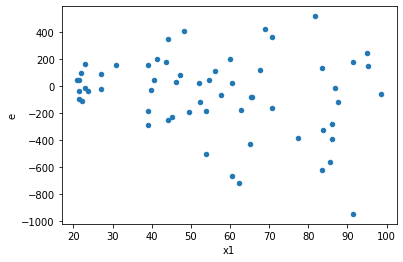

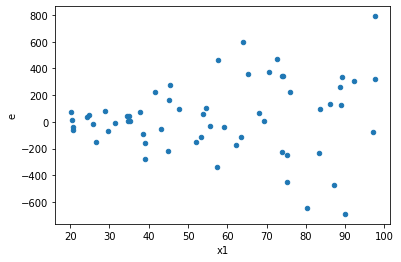

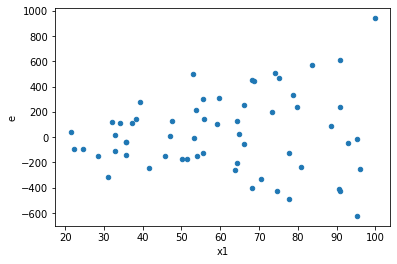

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,23.0,23.0,457956.03171348287,3005145.716524977,19911.13181362969,130658.50941412942,6.562083493651037,2.7986026715387524e-05,0.9999860069866423,1.3993013357693762e-05,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,809569.2010540788,6065996.8079503635,35198.66091539473,263738.9916500158,7.492870035140033,8.614566079589991e-06,0.9999956927169602,4.307283039794996e-06,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,1644227.124980804,6850163.918315118,71488.1358687306,297833.21383978776,4.166190798242118,0.0011255363793265527,0.9994372318103367,0.0005627681896632764,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,442905.6059938061,8392127.069291502,19256.76547799157,364875.0899691958,18.947890827574813,9.467753248060262e-10,0.9999999995266123,4.733876624030131e-10,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,393627.4855076289,5043176.157104444,17114.238500331692,219268.52856975843,12.812052874307483,5.169831673867975e-08,0.9999999741508416,2.5849158369339875e-08,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,372741.23082036595,6413350.580604931,16206.140470450693,278841.32959151873,17.205906002107124,2.5795665603567386e-09,0.9999999987102167,1.2897832801783693e-09,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,371760.38082416105,3221005.2377950535,16163.494818441784,140043.7059910893,8.664197165535391,2.2701903876765073e-06,0.9999988649048062,1.1350951938382536e-06,Reject001=0 : Heteroscedasticity
9.0,23.0,23.0,705321.0315792928,4201258.922854517,30666.13180779534,182663.43142845723,5.956520130198623,6.443202417516503e-05,0.9999677839879124,3.221601208758251e-05,Reject001=0 : Heteroscedasticity
10.0,23.0,23.0,515539.23924019485,5584166.485789659,22414.749532182384,242789.84720824606,10.831700209705941,2.703347661281441e-07,0.9999998648326169,1.3516738306407206e-07,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,457956.03171348287,3005145.716524977,19911.13181362969,130658.50941412942,6.562083493651037,2.7986026715387524e-05,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,6930066.788701353,713862.9177397967,301307.2516826675,31037.518162599856,0.10300952927375318,7.764121911115344e-07,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,809569.2010540788,6065996.8079503635,35198.66091539473,263738.9916500158,7.492870035140033,8.614566079589991e-06,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,1644227.124980804,6850163.918315118,71488.1358687306,297833.21383978776,4.166190798242118,0.0011255363793265527,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,442905.6059938061,8392127.069291502,19256.76547799157,364875.0899691958,18.947890827574813,9.467753248060262e-10,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,393627.4855076289,5043176.157104444,17114.238500331692,219268.52856975843,12.812052874307483,5.169831673867975e-08,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,372741.23082036595,6413350.580604931,16206.140470450693,278841.32959151873,17.205906002107124,2.5795665603567386e-09,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,3148831.5316987997,548651.3993629814,136905.71876951304,23854.408667955715,0.17423968028768536,8.818650154709903e-05,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,371760.38082416105,3221005.2377950535,16163.494818441784,140043.7059910893,8.664197165535391,2.2701903876765073e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    983
Reject001=1 : Homoscedasticity       17
Name: Result_test, dtype: int64